<a href="https://colab.research.google.com/github/AlexK2003/Class-Assignments/blob/main/CS%204410/HW_5/HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the k-NN classification example,
we demonstrated hyperparameter tuning to choose the best value of k. In k-means cluster-
ing, a challenge is determining the appropriate k value for clustering the data. One tech-
nique for determining k is called the elbow method. Investigate the elbow method, then
use it with the Digits and Iris datasets to determine whether this technique yields the cor-
rect number of classes for each dataset.

Additional instructions: Only use the elbow method with the iris dataset

# 15.18

##Import

In [10]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

## Training multiple k-means models

In [2]:
from sklearn.cluster import KMeans

k_values = range(1, 11)  # Trying k values from 1 to 10
wcss_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris.data)
    wcss_values.append(kmeans.inertia_)


print(wcss_values)

[681.3705999999996, 152.34795176035797, 78.85566582597727, 57.350880212954756, 46.47223015873018, 39.066035353535376, 34.305815295815314, 30.476222943722966, 29.906246659137977, 28.545297810033116]


##Plotting:

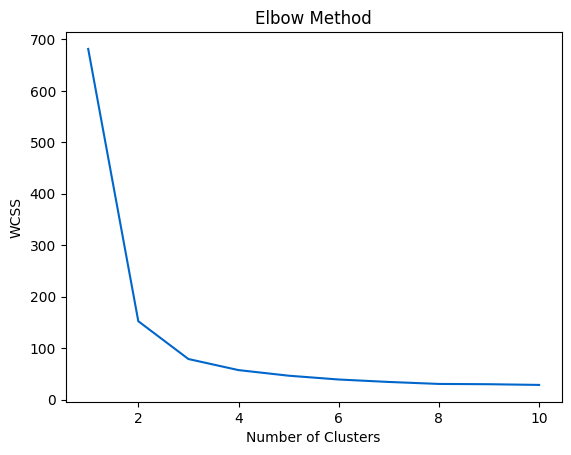

In [15]:
import matplotlib.pyplot as plt

plt.plot(k_values, wcss_values, linestyle="-", color=plt.cm.winter(0.4), label="Accuracy")
plt.xlabel("Number of Clusters") # Set x-axis label
plt.ylabel("WCSS") # Set y-axis label
plt.title("Elbow Method") # Set title
plt.show()

# 15.21

Get MNIST dataset as the instructions in 15.21. Use PCA dimensional reduction for logistic regression on MNIST to show how much PCA can help to speed up logistic regression.  For example, show the time difference and accuracy score values before and after applying PCA dimensional reduction.

##Imports

In [31]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


## Initial Run


In [34]:
from sklearn.model_selection import train_test_split

X, y = mnist

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [37]:
model = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)

start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()

start_training_time = end_time - start_time

start_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Initial Accuracy (No PCA): {start_accuracy:.4f}")
print(f"Initial Training Time (No PCA): {start_training_time:.2f} sec")

Initial Accuracy (No PCA): 0.9154
Initial Training Time (No PCA): 47.47 sec


## Applying PCA dimensional reduction

In [38]:
pca = PCA(n_components=0.95)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


## Running on PCA

In [40]:
# Initialize logistic regression model
model_pca = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)

# Start time measurement
start_time_pca = time.time()

# Train the model
model_pca.fit(X_train_pca, y_train)

# End time measurement
end_time_pca = time.time()

# Predict on test set
y_pred_pca = model_pca.predict(X_test_pca)

# Compute accuracy
pca_accuracy = accuracy_score(y_test, y_pred_pca)

# Compute training time
pca_training_time = end_time_pca - start_time_pca

print(f"PCA Accuracy ({0.95} components): {pca_accuracy:.4f}")
print(f"PCA Training Time ({0.95} components): {pca_training_time:.2f} sec")


PCA Accuracy (0.95 components): 0.9218
PCA Training Time (0.95 components): 35.68 sec


## Conclusion


In [41]:
print(f"Initial Accuracy (No PCA): {start_accuracy:.4f}")
print(f"Initial Training Time (No PCA): {start_training_time:.2f} sec")

print(f"PCA Accuracy ({0.95} components): {pca_accuracy:.4f}")
print(f"PCA Training Time ({0.95} components): {pca_training_time:.2f} sec")


Initial Accuracy (No PCA): 0.9154
Initial Training Time (No PCA): 47.47 sec
PCA Accuracy (0.95 components): 0.9218
PCA Training Time (0.95 components): 35.68 sec
